# Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import countplot
from matplotlib.pyplot import figure, show
from scipy import stats
import warnings
import xgboost as xgb
import gc
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import sklearn as sk
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
import pickle
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from pylab import rcParams
import pickle
from sklearn import metrics
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import warnings
import matplotlib.font_manager
warnings.filterwarnings("ignore")

# Importing Dataset

In [3]:
df = pd.read_csv('dataset/DG_out.csv',dtype={0:'object',1:'int64',2:'int64',3:'float64',4:'float64',5:'float64',6:'float64',7:'float64',8:'int64',9:'int64',10:'int64',11:'int64',12:'int64'})

# EDA

In [4]:
df.head()

,tx_hash,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
0,0437cd7f8525ceed2324359c2d0ba26006d92d856a9c20...,0,1,0.0,50.0,50.0,0.0,50.0,0,0,0,0,0
1,f4184fc596403b9d638783cf57adfe4c75c605f6356fbc...,1,2,50.0,50.0,100.0,50.0,25.0,0,0,0,0,0
2,ea44e97271691990157559d0bdd9959e02790c34db6c00...,1,1,10.0,10.0,20.0,10.0,10.0,0,0,0,0,0
3,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,1,1,40.0,30.0,70.0,40.0,30.0,0,0,0,0,0
4,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,1,2,30.0,30.0,60.0,30.0,15.0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30248134 entries, 0 to 30248133
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   tx_hash               object 
 1   indegree              int64  
 2   outdegree             int64  
 3   in_btc                float64
 4   out_btc               float64
 5   total_btc             float64
 6   mean_in_btc           float64
 7   mean_out_btc          float64
 8   in_malicious          int64  
 9   out_malicious         int64  
 10  is_malicious          int64  
 11  out_and_tx_malicious  int64  
 12  all_malicious         int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.9+ GB


In [6]:
df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,in_malicious,out_malicious,is_malicious,out_and_tx_malicious,all_malicious
count,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07,3.024813e+07
mean,2.148699e+00,2.148699e+00,5.484150e+01,5.484150e+01,1.096830e+02,4.923980e+01,2.877087e+01,4.039919e-05,2.148893e-06,1.553815e-06,3.570468e-06,4.383741e-05
std,7.421447e+00,4.512048e+00,1.303303e+03,1.301473e+03,2.602527e+03,9.729210e+02,7.125567e+02,6.355907e-03,1.465909e-03,1.246520e-03,1.889565e-03,6.620838e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00,1.000000e-01,9.950000e-02,2.058720e-01,6.400000e-02,5.025776e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,2.000000e+00,9.325000e-01,9.590000e-01,1.964759e+00,5.350261e-01,4.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,8.591912e+00,9.063657e+00,1.840000e+01,5.614287e+00,4.519481e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.932000e+03,1.322000e+03,5.500000e+05,5.000207e+05,1.050000e+06,4.992596e+05,5.000000e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

tx_hash                 0
indegree                0
outdegree               0
in_btc                  0
out_btc                 0
total_btc               0
mean_in_btc             0
mean_out_btc            0
in_malicious            0
out_malicious           0
is_malicious            0
out_and_tx_malicious    0
all_malicious           0
dtype: int64

In [8]:
df.shape

(30248134, 13)

# Data Visualization

In [9]:
pd.options.display.float_format = '{:.3f}'.format
o_df = df.iloc[:,1:8]
o_df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,2.149,2.149,54.842,54.842,109.683,49.240,28.771
std,7.421,4.512,1303.303,1301.473,2602.527,972.921,712.557
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,0.100,0.099,0.206,0.064,0.050
50%,1.000,2.000,0.932,0.959,1.965,0.535,0.490
75%,2.000,2.000,8.592,9.064,18.400,5.614,4.519
max,1932.000,1322.000,550000.000,500020.700,1050000.000,499259.588,500000.000


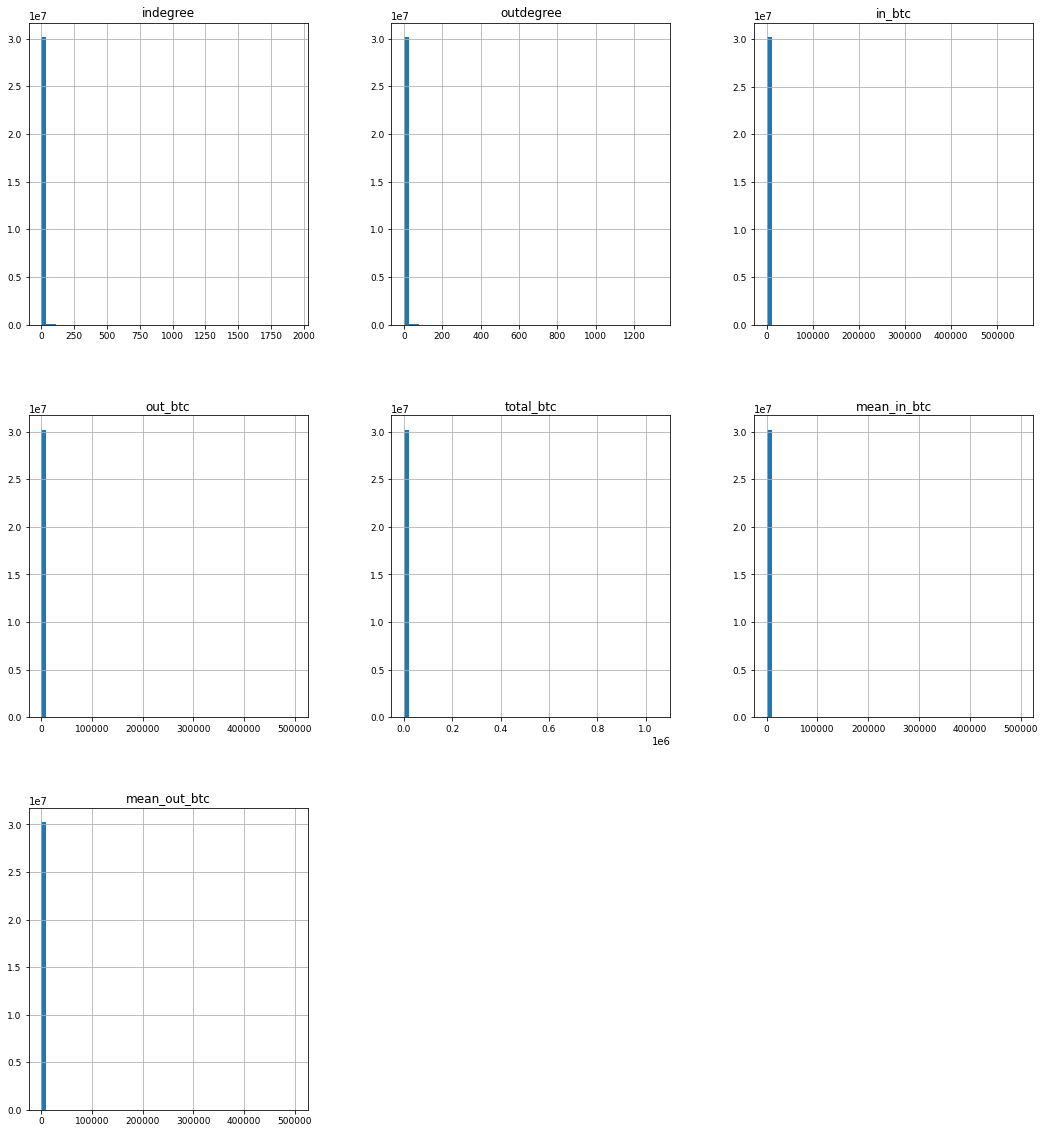

In [10]:
o_df.hist(figsize=(18, 20), bins=50, xlabelsize=9, ylabelsize=9, log=False);

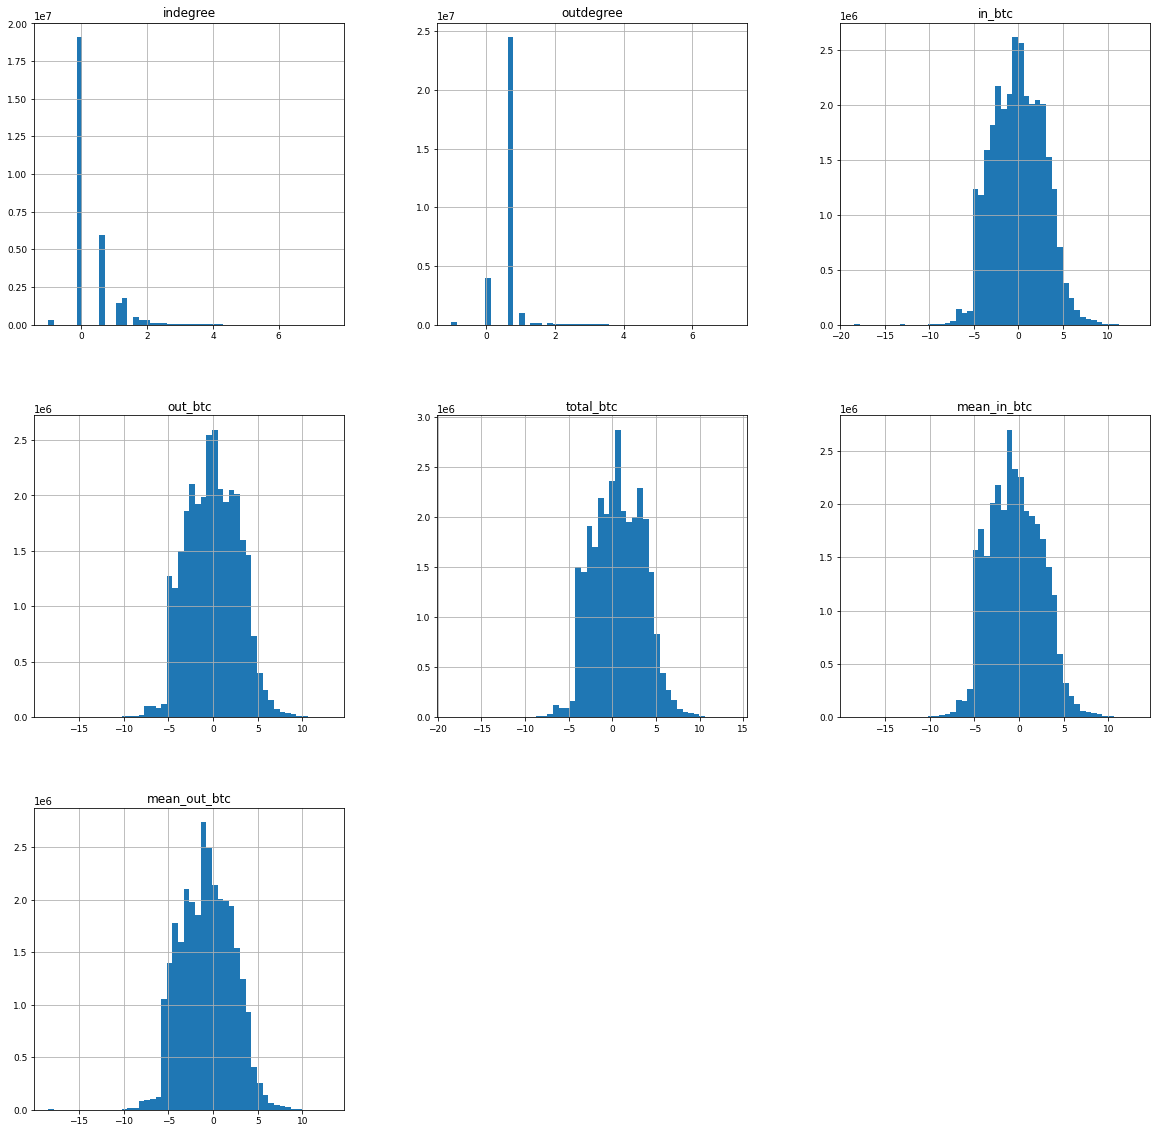

In [11]:
log_o_df1 = np.log(o_df).replace(-np.inf, -1)
log_o_df1.hist(figsize=(20, 20), bins=50, xlabelsize=9, ylabelsize=9, log=False);

# Cleaning the data

In [12]:

rob_scaler = RobustScaler()

scaled_df = log_o_df1.copy()

scaled_df['indegree'] = rob_scaler.fit_transform(scaled_df['indegree'].values.reshape(-1,1))
scaled_df['outdegree'] = rob_scaler.fit_transform(scaled_df['outdegree'].values.reshape(-1,1))
scaled_df['in_btc'] = rob_scaler.fit_transform(scaled_df['in_btc'].values.reshape(-1,1))
scaled_df['out_btc'] = rob_scaler.fit_transform(scaled_df['out_btc'].values.reshape(-1,1))
scaled_df['total_btc'] = rob_scaler.fit_transform(scaled_df['total_btc'].values.reshape(-1,1))
scaled_df['mean_in_btc'] = rob_scaler.fit_transform(scaled_df['mean_in_btc'].values.reshape(-1,1))
scaled_df['mean_out_btc'] = rob_scaler.fit_transform(scaled_df['mean_out_btc'].values.reshape(-1,1))

In [13]:
pd.options.display.float_format = '{:.6f}'.format
scaled_df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000000,30248134.000000,30248134.000000,30248134.000000,30248134.000000,30248134.000000,30248134.000000
mean,0.549295,-0.058114,0.006613,0.000223,-0.001203,0.044424,0.007085
std,0.931814,0.373407,0.643707,0.643069,0.636120,0.661765,0.648637
min,-1.442695,-1.693147,-4.170404,-4.096177,-4.250319,-4.068037,-4.000418
25%,0.000000,0.000000,-0.495322,-0.499392,-0.502102,-0.462612,-0.498066
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.504678,0.500608,0.497898,0.537388,0.501934
max,10.915879,6.493754,3.019732,2.933985,2.935537,3.142444,3.125747


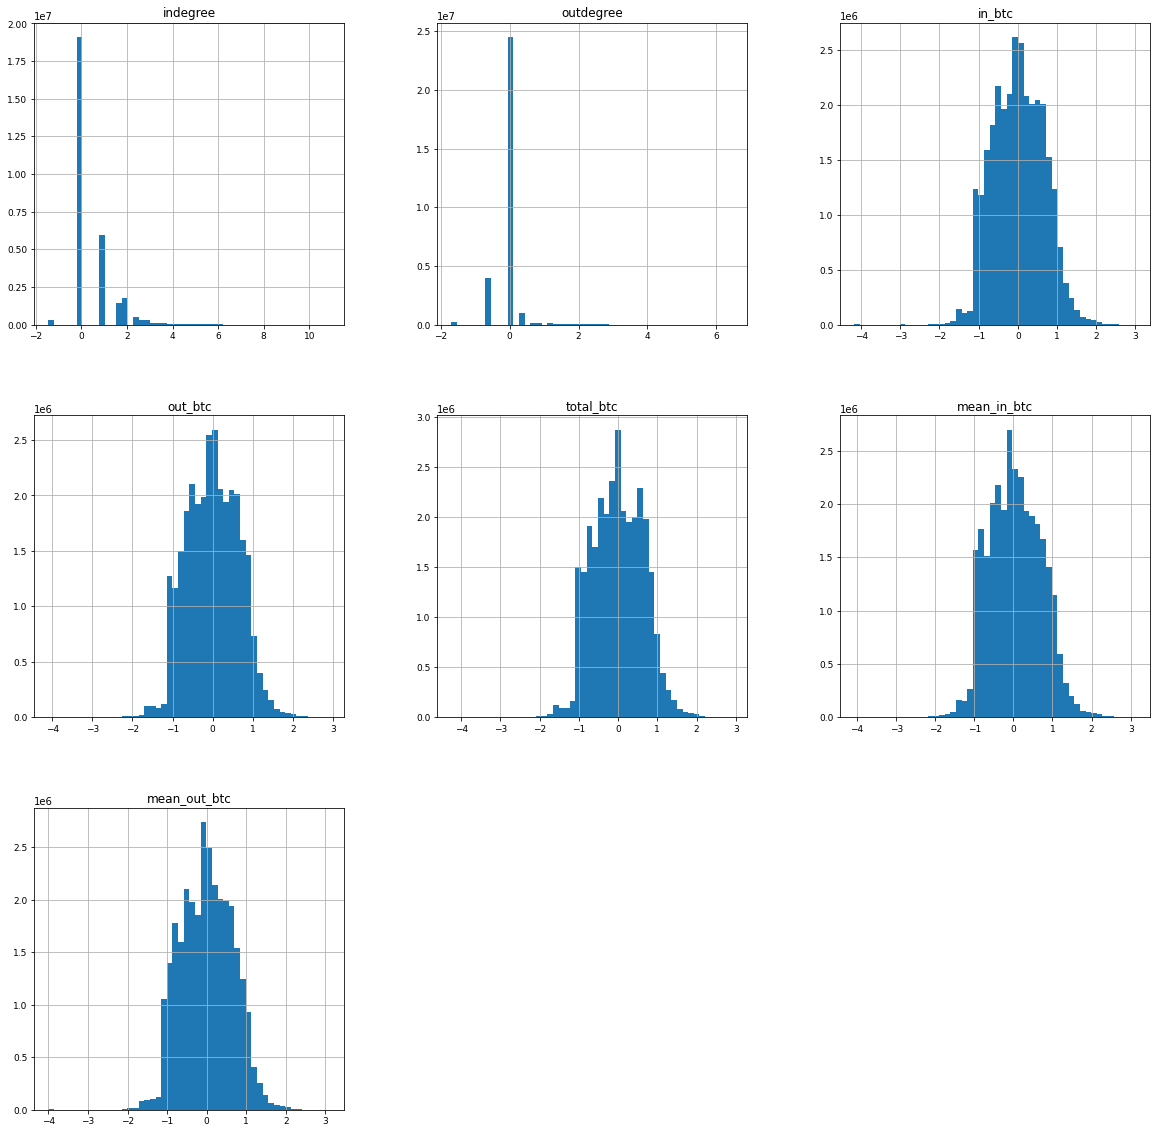

In [14]:
scaled_df.hist(figsize=(20, 20), bins=50, xlabelsize=9, ylabelsize=9, log=False);

# Building Model

In [15]:
df.drop('tx_hash', axis=1, inplace=True)
df.drop('in_malicious', axis=1, inplace=True)
df.drop('out_malicious', axis=1, inplace=True)
df.drop('is_malicious', axis=1, inplace=True)
df.drop('all_malicious', axis=1, inplace=True)

In [16]:
df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
count,30248134.000000,30248134.000000,30248134.000000,30248134.000000,30248134.000000,30248134.000000,30248134.000000,30248134.000000
mean,2.148699,2.148699,54.841501,54.841501,109.683002,49.239797,28.770874,0.000004
std,7.421447,4.512048,1303.302881,1301.473470,2602.526618,972.920965,712.556663,0.001890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.100000,0.099500,0.205872,0.064000,0.050258,0.000000
50%,1.000000,2.000000,0.932500,0.959000,1.964759,0.535026,0.490000,0.000000
75%,2.000000,2.000000,8.591912,9.063657,18.400000,5.614287,4.519481,0.000000
max,1932.000000,1322.000000,550000.000000,500020.700377,1050000.000000,499259.587549,500000.000000,1.000000


In [17]:
print('No Frauds', round(df['out_and_tx_malicious'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['out_and_tx_malicious'].value_counts()[1]/len(df) * 100,5), '% of the dataset')

No Frauds 100.0 % of the dataset
Frauds 0.00036 % of the dataset


In [18]:
df['out_and_tx_malicious'].value_counts()

0    30248026
1         108
Name: out_and_tx_malicious, dtype: int64

In [19]:
X = df.drop('out_and_tx_malicious', axis=1)
y = df['out_and_tx_malicious']

In [20]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

# Linear Regression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

In [22]:
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

precision = precision_score(y_test, y_pred_binary) * 100
recall = recall_score(y_test, y_pred_binary) * 100
f1 = f1_score(y_test, y_pred_binary) * 100
accuracy = accuracy_score(y_test, y_pred_binary) * 100


conf_matrix = confusion_matrix(y_test, y_pred_binary)


true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

specificity = true_negative / (true_negative + false_positive) * 100
sensitivity = true_positive / (true_positive + false_negative) * 100


print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

Precision: 98.16403671395997
Recall: 36.70442677959707
F1 Score: 53.43064797545273
Accuracy: 68.01323656559093
Specificity: 99.31369962905006
Sensitivity: 36.70442677959707


# Naive Bayes

In [23]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [24]:
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

precision1 = precision_score(y_test, y_pred_binary) * 100
recall1 = recall_score(y_test, y_pred_binary) * 100
f11 = f1_score(y_test, y_pred_binary) * 100
accuracy1 = accuracy_score(y_test, y_pred_binary) * 100


conf_matrix = confusion_matrix(y_test, y_pred_binary)


true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

specificity1 = true_negative / (true_negative + false_positive) * 100
sensitivity1 = true_positive / (true_positive + false_negative) * 100


print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)
print("Accuracy:", accuracy1)
print("Specificity:", specificity1)
print("Sensitivity:", sensitivity1)

Precision: 97.76281224966147
Recall: 31.796774863902733
F1 Score: 47.98629264601956
Accuracy: 65.53916614893318
Specificity: 99.27256193462529
Sensitivity: 31.796774863902733


# Xgboost

In [26]:
xg = xgb.XGBClassifier()

xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)

In [27]:
y_pred_binary = [1 if val >= 0.5 else 0 for val in y_pred]

precision2 = precision_score(y_test, y_pred_binary) * 100
recall2 = recall_score(y_test, y_pred_binary) * 100
f12 = f1_score(y_test, y_pred_binary) * 100
accuracy2 = accuracy_score(y_test, y_pred_binary) * 100


conf_matrix = confusion_matrix(y_test, y_pred_binary)


true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

specificity2 = true_negative / (true_negative + false_positive) * 100
sensitivity2 = true_positive / (true_positive + false_negative) * 100


print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)
print("Accuracy:", accuracy2)
print("Specificity:", specificity2)
print("Sensitivity:", sensitivity2)

Precision: 96.00683043905516
Recall: 95.81174709227402
F1 Score: 95.90918956382325
Accuracy: 95.91389058344383
Specificity: 96.01600684383146
Sensitivity: 95.81174709227402


# Comparison

In [29]:
results ={'Accuracy': [accuracy,accuracy1,accuracy2],
 'Recall':[recall,recall1,recall2],
 'Precision': [precision,precision1,precision2],
  'F1 Score' : [f1,f11,f12],
  'Sensitivity' : [sensitivity,sensitivity1,sensitivity2],
  'Specificity' : [specificity,specificity1,specificity2]}
index = ['Linear Regression','Naive Bayes','Xgboost']

In [30]:
results =pd.DataFrame(results,index=index)

In [31]:
print(results)

                   Accuracy    Recall  Precision  F1 Score  Sensitivity  \
Linear Regression 68.013237 36.704427  98.164037 53.430648    36.704427   
Naive Bayes       65.539166 31.796775  97.762812 47.986293    31.796775   
Xgboost           95.913891 95.811747  96.006830 95.909190    95.811747   

                   Specificity  
Linear Regression    99.313700  
Naive Bayes          99.272562  
Xgboost              96.016007  


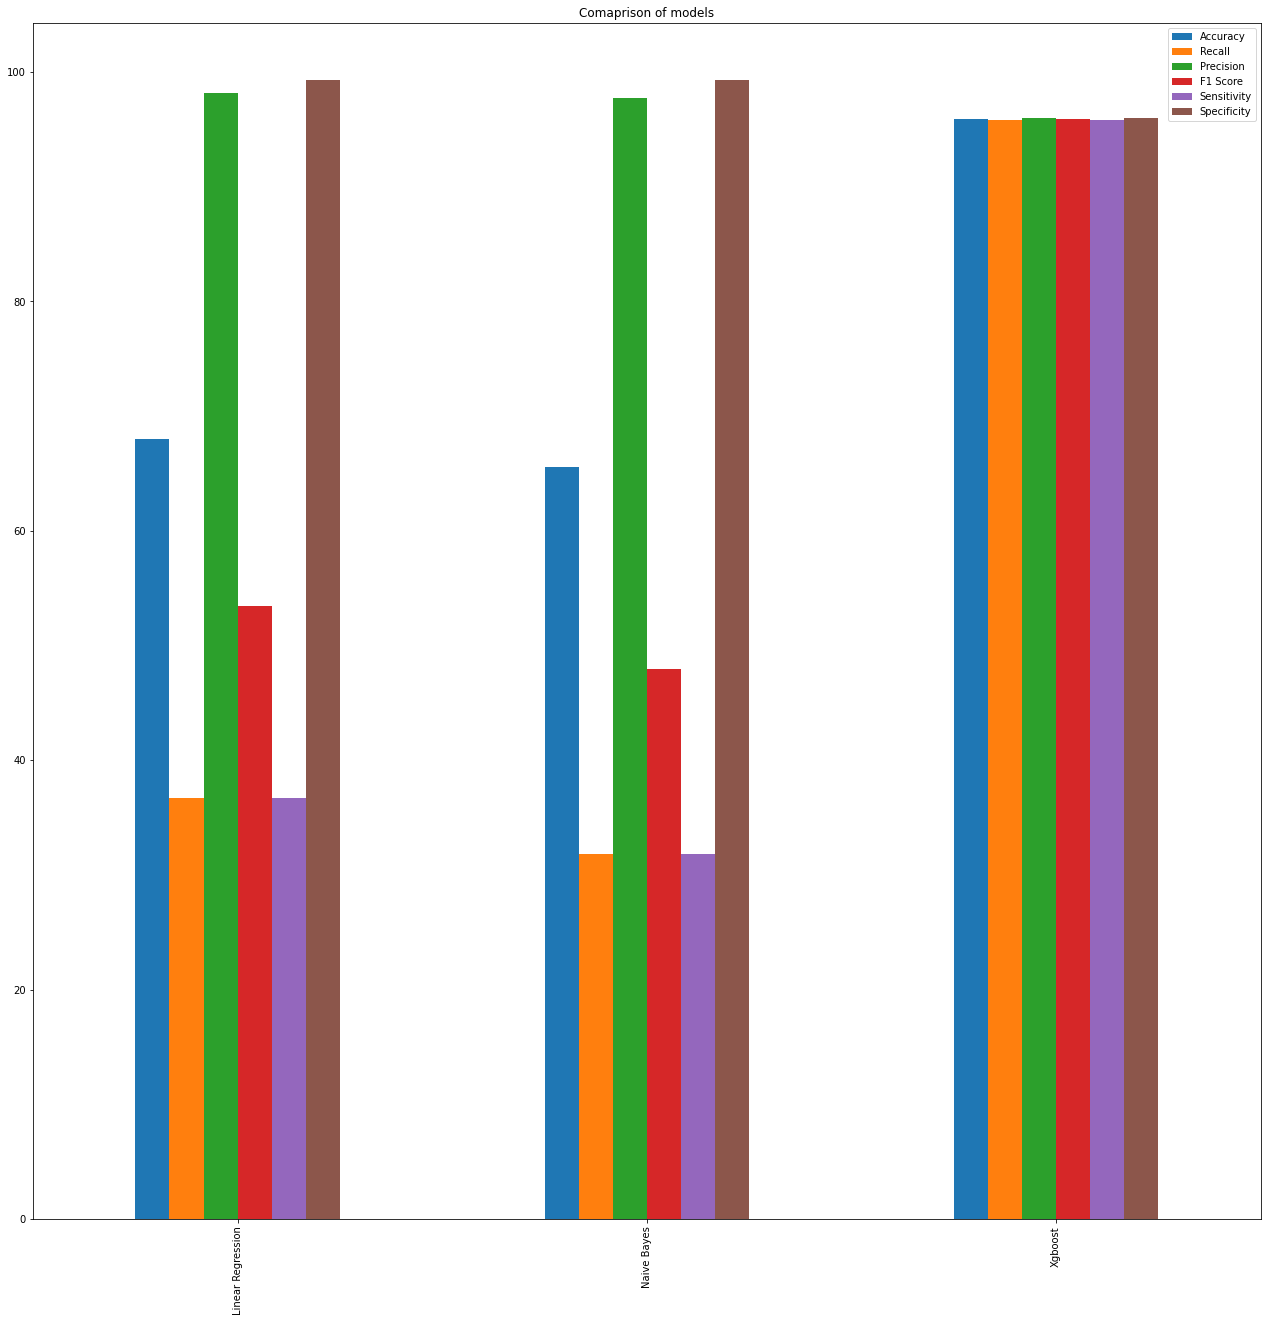

In [32]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(22,22)).get_figure()
fig.savefig('Final Result.png')

array([<AxesSubplot:title={'center':'Accuracy'}>,
       <AxesSubplot:title={'center':'Recall'}>,
       <AxesSubplot:title={'center':'Precision'}>,
       <AxesSubplot:title={'center':'F1 Score'}>,
       <AxesSubplot:title={'center':'Sensitivity'}>,
       <AxesSubplot:title={'center':'Specificity'}>], dtype=object)

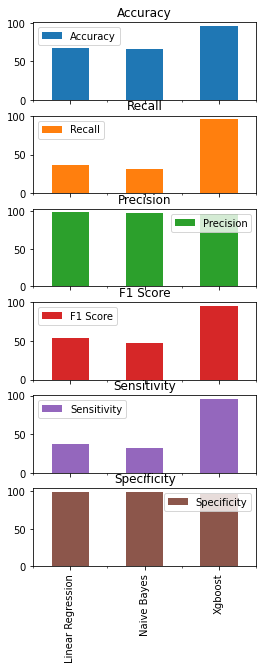

In [33]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

# Saving the model

In [34]:
pickle.dump(xg,open('model.sav','wb'))